In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [325]:
dtrain=pd.read_csv('train_LZdllcl.csv')
dtrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [326]:
dtrain.shape

(54808, 14)

In [327]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [328]:
dtest=pd.read_csv('test_2umaH9m (1).csv')
dtest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [329]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [330]:
dtest.shape

(23490, 13)

In [331]:
train_len=len(dtrain)
test_len=len(dtest)

In [332]:
data=pd.concat([dtest,dtrain],axis=0)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,NaN
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,NaN
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,NaN
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,NaN
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,NaN


In [333]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [334]:
mode = data["education"].mode()
mode

0    Bachelor's
Name: education, dtype: object

In [335]:
data['education']=data['education'].fillna("Bachelor's")

In [336]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(data['previous_year_rating'].median())

In [337]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [338]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8723,8,18,0,1,2,0,4,2,0,1,0,38,2
1,74429,2,28,0,0,0,0,11,2,4,0,0,12,2
2,72254,7,4,0,1,0,0,11,0,3,0,0,8,2
3,38561,5,11,0,0,0,2,11,1,8,0,0,26,2
4,64485,1,21,0,1,2,0,10,3,6,0,0,22,2


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   employee_id           78298 non-null  int64
 1   department            78298 non-null  int32
 2   region                78298 non-null  int32
 3   education             78298 non-null  int32
 4   gender                78298 non-null  int32
 5   recruitment_channel   78298 non-null  int32
 6   no_of_trainings       78298 non-null  int64
 7   age                   78298 non-null  int64
 8   previous_year_rating  78298 non-null  int64
 9   length_of_service     78298 non-null  int64
 10  KPIs_met >80%         78298 non-null  int64
 11  awards_won?           78298 non-null  int64
 12  avg_training_score    78298 non-null  int64
 13  is_promoted           78298 non-null  int64
dtypes: int32(5), int64(9)
memory usage: 7.5 MB


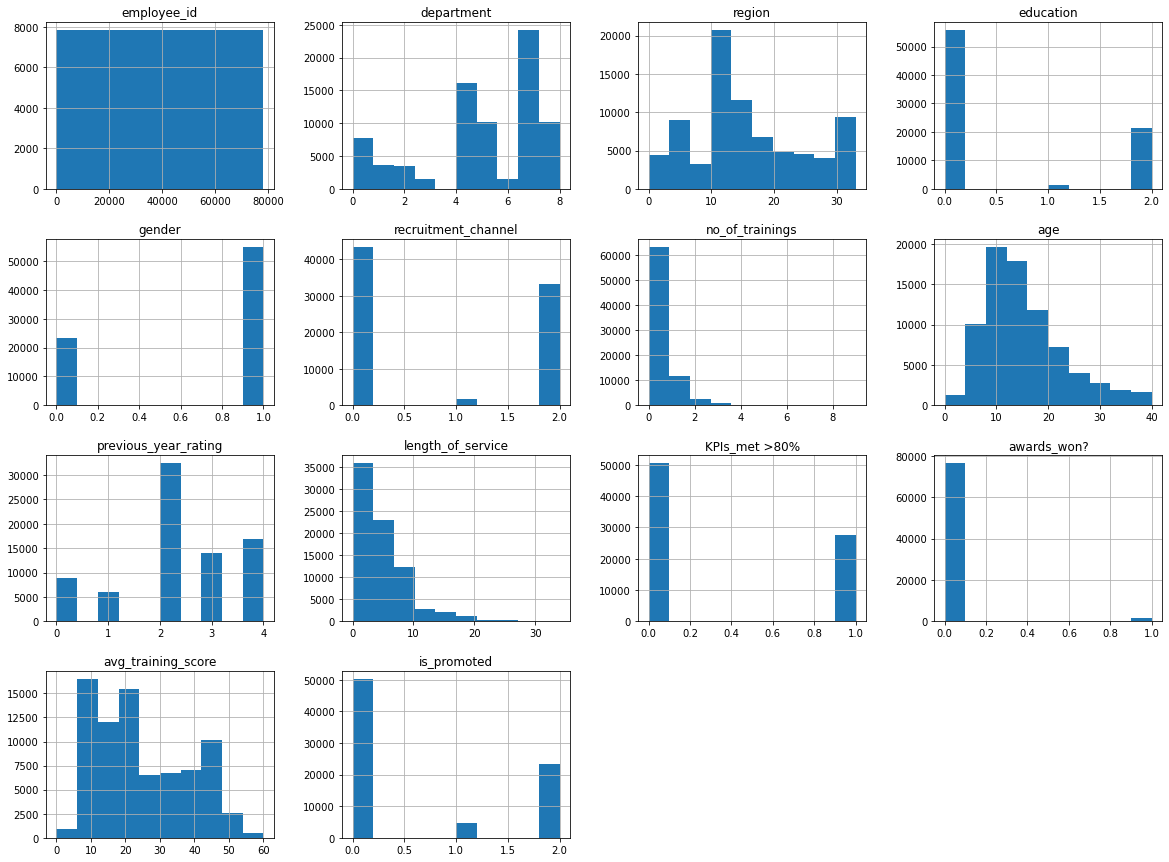

In [340]:
freqgraph = data.select_dtypes(include =['int32','int64'])
freqgraph.hist(figsize =(20,15))
plt.show()

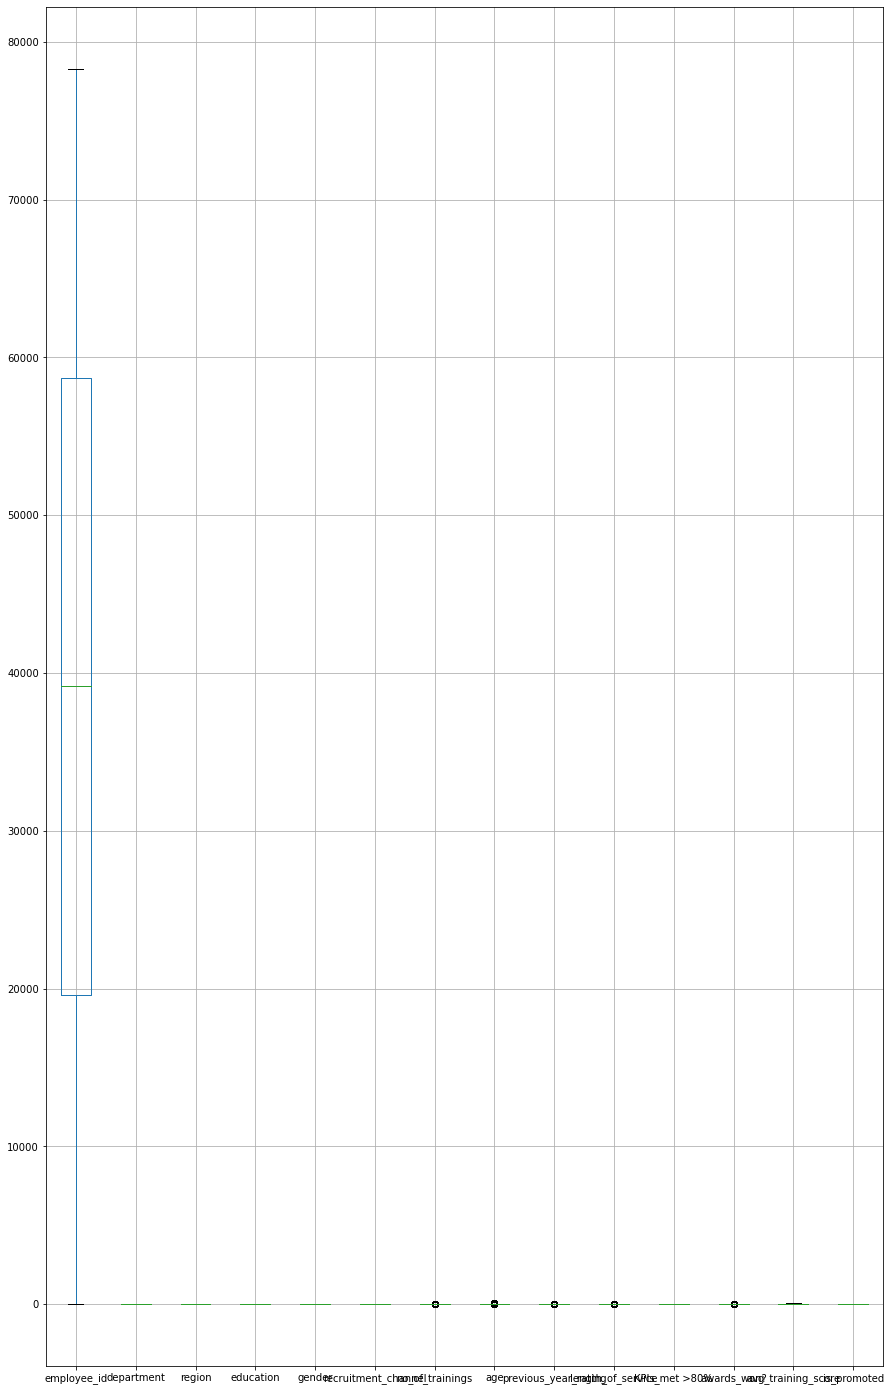

In [341]:
data.boxplot(figsize=(15,25))
plt.show()

In [342]:
Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['age']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['age']>uplim
x=data.loc[ind1].index

In [343]:
data.drop(x,inplace = True)

In [344]:
Q1=np.percentile(data['no_of_trainings'],25,interpolation='midpoint')
Q2=np.percentile(data['no_of_trainings'],50,interpolation='midpoint')
Q3=np.percentile(data['no_of_trainings'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['no_of_trainings']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['no_of_trainings']>uplim
x=data.loc[ind1].index

In [345]:
data.drop(x,inplace = True)

In [346]:
Q1=np.percentile(data['length_of_service'],25,interpolation='midpoint')
Q2=np.percentile(data['length_of_service'],50,interpolation='midpoint')
Q3=np.percentile(data['length_of_service'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['length_of_service']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['length_of_service']>uplim
x=data.loc[ind1].index

In [347]:
data.drop(x,inplace = True)

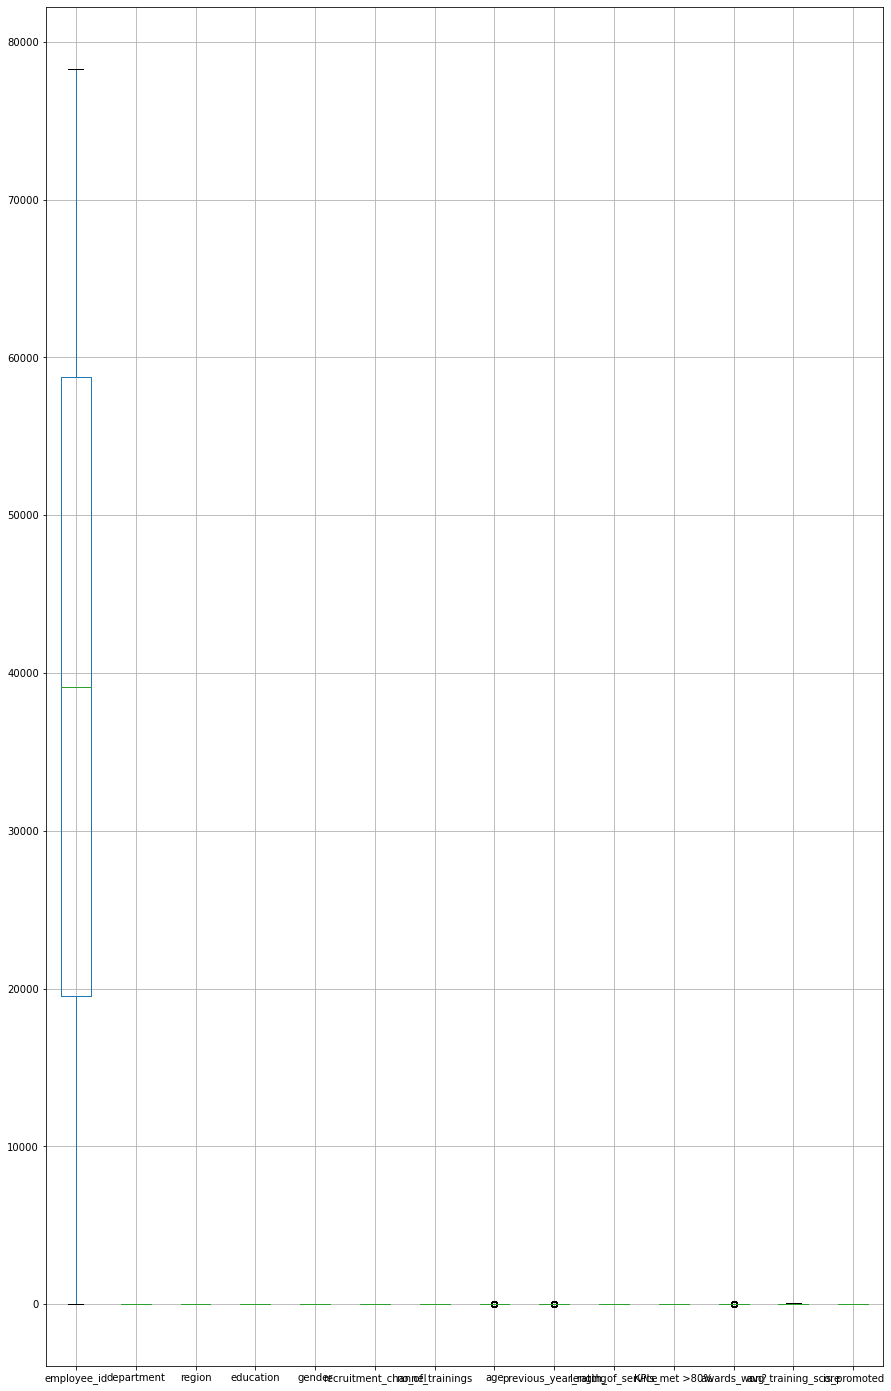

In [348]:
data.boxplot(figsize=(15,25))
plt.show()

In [399]:
dtrain=data.iloc[:train_len,:]
dtest=data.iloc[test_len:,:]

In [400]:
dtrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8723,8,18,0,1,2,0,4,2,0,1,0,38,2
1,74429,2,28,0,0,0,0,11,2,4,0,0,12,2
2,72254,7,4,0,1,0,0,11,0,3,0,0,8,2
4,64485,1,21,0,1,2,0,10,3,6,0,0,22,2
6,54541,1,11,0,1,0,0,13,4,2,1,0,18,2


In [401]:
dtrain.shape

(48974, 14)

In [402]:
dtest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
19385,1834,0,12,2,1,0,0,13,2,7,0,0,44,0
19387,49502,4,28,2,1,0,0,6,2,0,1,0,18,0
19389,41196,0,14,0,1,0,0,10,0,3,0,0,47,0
19390,64070,4,18,2,0,2,0,15,2,4,0,0,19,0
19393,34208,7,11,2,0,2,0,19,2,3,0,0,8,0


In [403]:
dtest.shape

(25484, 14)

In [381]:
y=dtrain['is_promoted']
x=dtrain.drop(['is_promoted'],axis=1)

In [382]:
x.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,48974.000000,48974.000000,48974.000000,48974.000000,48974.000000,48974.000000,48974.0,48974.000000,48974.000000,48974.000000,48974.000000,48974.000000,48974.000000
mean,39097.367379,4.961755,15.608302,0.535815,0.685650,0.875955,0.0,13.705578,2.332544,4.090089,0.370462,0.024319,23.983338
std,22617.962875,2.475062,8.962748,0.876349,0.464261,0.980997,0.0,6.292504,1.220559,2.905338,0.482933,0.154039,13.250886
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19521.250000,4.000000,11.000000,0.000000,0.000000,0.000000,0.0,9.000000,2.000000,2.000000,0.000000,0.000000,12.000000
50%,39081.500000,5.000000,14.000000,0.000000,1.000000,0.000000,0.0,13.000000,2.000000,4.000000,0.000000,0.000000,21.000000
75%,58770.500000,7.000000,23.000000,2.000000,1.000000,2.000000,0.0,17.000000,3.000000,6.000000,1.000000,0.000000,35.000000
max,78297.000000,8.000000,33.000000,2.000000,1.000000,2.000000,0.0,34.000000,4.000000,12.000000,1.000000,1.000000,60.000000


In [383]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler()
x = minmax.fit_transform(x)
x=pd.DataFrame(x)

In [384]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 34,test_size =0.2 )

In [385]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# 1.LinearRegression

In [386]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(x_train,y_train)
predictions= model.predict(x_test)

print(y_test)
print(predictions)

53838    0
17565    0
7848     0
40374    0
47507    0
        ..
48502    0
23302    0
51923    0
46042    0
18376    2
Name: is_promoted, Length: 9795, dtype: int64
[0.49582313 0.54012403 0.65898651 ... 0.5471648  0.59321095 0.65652876]


In [387]:
from sklearn.metrics import mean_squared_error
print('MSe is ',mean_squared_error(y_test,predictions))

from sklearn.metrics import r2_score
print('R squared value is ',r2_score(y_test,predictions))

MSe is  0.7578448009093302
R squared value is  0.007589132172752477


# 2.LogisticRegression

In [388]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions= logmodel.predict(x_test)

In [389]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.6750382848392037


array([[6575,   19,    0],
       [ 611,   37,    0],
       [2534,   19,    0]], dtype=int64)

# 3.KNN

In [390]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors=np.arange(3,15)
for K in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=K,metric='minkowski')
    classifier.fit(x_train,y_train)
    predictions= classifier.predict(x_test)
    acc=accuracy_score(y_test,predictions)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

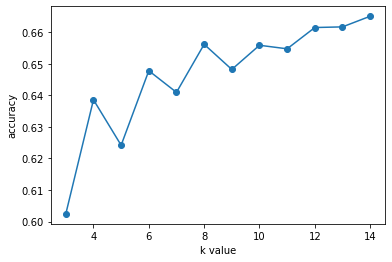

In [391]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [392]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_test)

In [393]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.6385911179173047


array([[5943,  105,  546],
       [ 477,   91,   80],
       [2272,   60,  221]], dtype=int64)

# 4.decision tree

In [371]:
from sklearn.tree  import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
predictions= dtmodel.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.5404798366513527


# 5.SVM

In [372]:
from sklearn.svm import SVC
svmlinear = SVC(kernel='linear')
svmlinear.fit(x_train,y_train)
predictions= svmlinear.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.6732006125574272


In [373]:
svmpoly = SVC(kernel='poly',degree =3)
svmpoly.fit(x_train,y_train)
predictions= svmpoly.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.6777947932618683


In [374]:
svmradial = SVC(kernel='rbf')
svmradial.fit(x_train,y_train)
predictions= svmradial.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.677590607452782


# 6.RandomForest

In [394]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions= rf.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [395]:
y=print(y_test)
x=print(predictions)

53838    0
17565    0
7848     0
40374    0
47507    0
        ..
48502    0
23302    0
51923    0
46042    0
18376    2
Name: is_promoted, Length: 9795, dtype: int64
[0 0 0 ... 0 0 0]


In [377]:
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.678305257784584


# 7.Gaussion Naive Bayes

In [236]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_test)

In [237]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.6233718358318997


array([[5016,   70,    0],
       [ 425,   57,    0],
       [2514,   56,    0]], dtype=int64)

# 8.Bernoulli Naive Bayes

In [238]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_test)

In [239]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.6230031948881789


array([[5041,   45,    0],
       [ 453,   29,    0],
       [2533,   37,    0]], dtype=int64)

In [396]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [404]:
xtest=dtest.drop(['is_promoted'],axis=1)

In [405]:
predictions= rf.predict(xtest)
predictions

C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [406]:
sub=pd.DataFrame()
sub['employee_id']=dtest['employee_id']
sub['is_promoted']=predictions
sub.head()

,employee_id,is_promoted
19385,1834,1
19387,49502,1
19389,41196,0
19390,64070,1
19393,34208,1


In [407]:
sub.shape

(25484, 2)

In [408]:
sub.to_csv('mysubfinal.csv',index=False)